In [2]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
import sklearn.linear_model as skl_lm
from sklearn.model_selection import train_test_split, LeaveOneOut, KFold, cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE #Feature ranking with recursive feature elimination.
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf


import plotly.express as px

%matplotlib inline
plt.style.use('seaborn-white')

In [4]:
PROJECT_ROOT_DIR = "/Users/daniel421/Desktop/STAT_724/ds_724/Final_Project"
CHAPTER_ID = "classification_methods"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
# os.makedirs(IMAGES_PATH, exist_ok=True)
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Importing the data

Getting the vizual dataframe if more plots are needed

In [5]:
import os
#UP_DIR = '/Users/daniel421/Desktop/STAT_724/ISLR_data'
csv_file = os.path.join(PROJECT_ROOT_DIR,'listings_6.csv')
abnb = pd.read_csv(csv_file, low_memory=False)
abnb = pd.DataFrame(data = abnb)
abnb_viz = abnb

Imputing the data with mean values. Creating the numerical dataframe

In [6]:
abnb.fillna(abnb.mean(), inplace=True)
abnb = pd.DataFrame(data = abnb)
abnb_df = abnb.drop(abnb.columns[[4,5,6,-1]], axis = 1)

Rescaling the variables

In [7]:
# rescaling the variables (both)
scaler = MinMaxScaler()
abnb_df_scaled = scaler.fit_transform(abnb_df)
# rename columns (since now its an np array)
abnb_df_scaled = pd.DataFrame(abnb_df_scaled)
abnb_df_scaled.columns = abnb_df.columns
# print(abnb_df_scaled.iloc[:5,:5])

## Perhaps we make the response variable, "instant_bookable2." 

In [8]:
abnb_X = abnb_df_scaled.drop(['instant_bookable2'], axis = 1)
abnb_y = abnb_df_scaled['instant_bookable2']

train, test, split data, with new response variable

In [9]:
X_train, X_test, y_train, y_test = train_test_split(abnb_X, abnb_y, test_size=0.3, random_state=10)

In [10]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(11193, 41)
(4798, 41)
(11193,)
(4798,)


# SVM

In [11]:
from sklearn.svm import SVC

In [29]:
# SVM Classifier model - cost for margin violation is C=10
svm_clf = SVC(kernel="linear", C=10.0)  #C=float("inf"))
svm_clf.fit(X_train, y_train)

# Repeat the fit with smaller "cost" C=0.1 (results in wider margins)
svm_clf2 = SVC(kernel="linear", C=1)  #C=float("inf"))
svm_clf2.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [30]:
yy = np.array(y_train)  # turn "y" into a numpy array to allow the subsetting below

Plot

In [75]:
print(X_train["accommodates"].min())
print(X_train["accommodates"].max())
print(X_train["bedrooms"].min())
print(X_train["bedrooms"].max())

0.0
1.0
0.0
1.0


In [31]:
# Plotting function
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)   

In [33]:
# print(X_train.iloc[:, 0][yy==0])
print(X_train.iloc[:, 5][yy==1])

15177    0.000000
3338     0.125000
11095    0.047935
7037     0.000000
14180    0.000000
           ...   
10742    0.000000
12328    0.047935
14826    0.000000
9372     0.000000
12815    0.375000
Name: bedrooms, Length: 3084, dtype: float64


In [ ]:
#perhaps use PCA
#pick two of the most important features, perhaps from the regression methods
# select the "accomodates and reviews per month variable"

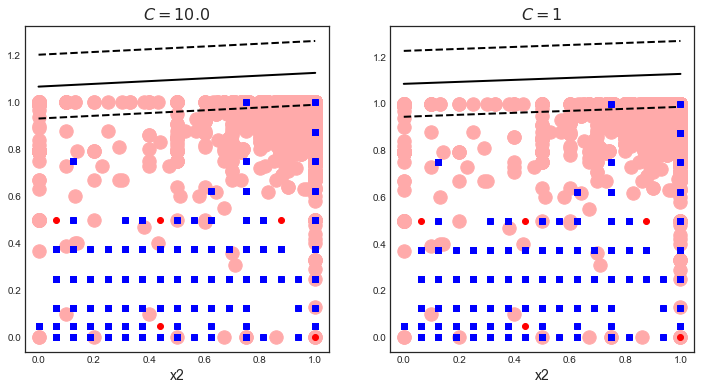

In [82]:
plt.figure(figsize=(12,6))

# Plot for C=10
plt.subplot(121)
plot_svc_decision_boundary(svm_clf, 0, 1)
plt.plot(X_train.iloc[:, 4][yy==1], X_train.iloc[:, 5][yy==1], "ro")
plt.plot(X_train.iloc[:, 4][yy==0], X_train.iloc[:, 5][yy==0], "bs")
plt.title("$C = {}$".format(svm_clf.C), fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.xlabel("x2", fontsize=14)
# plt.axis([0, 1, 0, 1])

# Plot for C=1
plt.subplot(122)
plot_svc_decision_boundary(svm_clf2, 0, 1)
plt.plot(X_train.iloc[:, 4][yy==1], X_train.iloc[:, 5][yy==1], "ro") # "g^"
plt.plot(X_train.iloc[:, 4][yy==0], X_train.iloc[:, 5][yy==0], "bs")
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.xlabel("x2", fontsize=14)
# plt.axis([-1.5, 2.8, -2.2, 2.8])

#save_fig("large_margin_classification_plot")
plt.show()

The following plot will take approximately 1 min and 33 seconds to run

Optimal number of features : 41


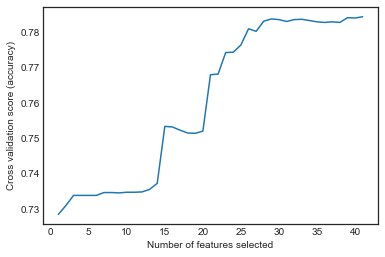

In [28]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification

# Build a classification task using 3 informative features
# X, y = make_classification(
#     n_samples=1000,
#     n_features=25,
#     n_informative=3,
#     n_redundant=2,
#     n_repeated=0,
#     n_classes=8,
#     n_clusters_per_class=1,
#     random_state=0,
# )

# Create the RFE object and compute a cross-validated score.
svc = SVC(kernel="linear")
# The "accuracy" scoring shows the proportion of correct classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(
    estimator=svc,
    step=1,
    cv=StratifiedKFold(2),
    scoring="accuracy",
    min_features_to_select=min_features_to_select,
)
rfecv.fit(X_train, y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(
    range(min_features_to_select, len(rfecv.grid_scores_) + min_features_to_select),
    rfecv.grid_scores_,
)
plt.show()

## Nonlinear SVM classification methods

This took a minimum of 3minutes nd 35 seconds

In [36]:
# from sklearn.svm import LinearSVC
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler

# # X, y = make_moons(n_samples=100, noise=0.15)

# polynomial_svm_clf = Pipeline([
#         ("poly_features", PolynomialFeatures(degree=10)),
#         ("scaler", StandardScaler()),
#         ("svm_clf", LinearSVC(C=60, loss="hinge"))
#     ])

# polynomial_svm_clf.fit(X_train, y_train)

KeyboardInterrupt: 

# K-means clustering

In [38]:
from sklearn.cluster import KMeans

Becuase the dataset is too large, this k-means algorithn is only used on the "accomodates" and "bedroom" fields

## K = 5

In [85]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_train.iloc[:, 4:6])

In [86]:
print(y_pred)

[1 0 0 ... 1 1 0]


In [87]:
print(kmeans.cluster_centers_)

[[0.11971173 0.00950862]
 [0.42201087 0.25836059]
 [0.28065604 0.13289393]
 [0.75826149 0.34874377]
 [0.26607884 0.00839361]]


In [70]:
# Perhaps stick to PCA

In [88]:
def plot_data(X):
    plt.plot(X_train.iloc[:, 4], X_train.iloc[:, 5], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='b'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=10, linewidths=11,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


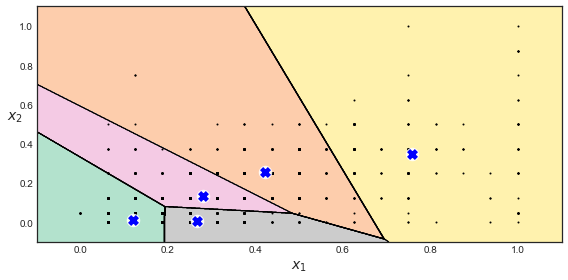

In [89]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_train)
save_fig("voronoi_plot")
plt.show()

## K = 10

In [93]:
k2 = 10
kmeans2 = KMeans(n_clusters=k2, random_state=42)
y_pred = kmeans2.fit_predict(X_train.iloc[:, 4:6])

In [94]:
def plot_data(X):
    plt.plot(X_train.iloc[:, 4], X_train.iloc[:, 5], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='b'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=10, linewidths=11,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

Saving figure voronoi_plot


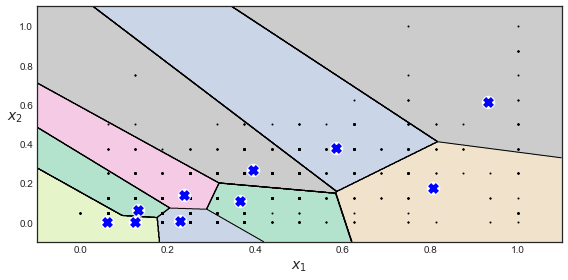

In [95]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans2, X_train)
save_fig("voronoi_plot")
plt.show()

# Discriminant Analysis

In [47]:
import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression #perhaps this wont be needed
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn import preprocessing
from sklearn import neighbors
from patsy import dmatrices
from IPython.display import Image
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline
plt.style.use('seaborn-white')

## LDA

In [50]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
# qda = QuadraticDiscriminantAnalysis()
# qda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [53]:
?lda.predict

Signature: lda.predict(X)
Docstring:
Predict class labels for samples in X.

Parameters
----------
X : array-like or sparse matrix, shape (n_samples, n_features)
    Samples.

Returns
-------
C : array, shape [n_samples]
    Predicted class label per sample.
File:      /opt/anaconda3/envs/sfds/lib/python3.9/site-packages/sklearn/linear_model/_base.py
Type:      method


In [54]:
pred = lda.predict(X_test)

In [56]:
print(lda.priors_)

[0.72447065 0.27552935]


In [57]:
print(lda.means_)

[[8.77859169e-01 7.34198901e-01 3.96025780e-03 3.96025780e-03
  1.87823714e-01 5.13324847e-02 4.40530132e-02 1.64415628e-02
  1.50337784e-02 2.81530579e-01 1.48109289e-02 1.55574521e-02
  8.29491870e-07 1.72044269e-06 1.52820294e-02 1.13632162e-06
  2.97032104e-01 3.75048300e-01 4.73745221e-01 5.06967567e-01
  3.78797221e-02 1.27305922e-02 1.36062811e-02 9.34382618e-01
  9.36714781e-01 9.11462505e-01 9.56663491e-01 9.50260219e-01
  9.38456020e-01 9.10090595e-01 3.44264524e-02 2.92860110e-02
  1.63625466e-02 5.40140585e-03 1.42775618e-02 3.39992601e-01
  8.48809964e-01 9.97656924e-01 3.08299420e-03 3.79208287e-01
  1.44284129e-02]
 [9.42989624e-01 9.53473230e-01 1.29150072e-02 1.29150072e-02
  1.86588035e-01 3.91723414e-02 3.98318657e-02 1.64345228e-02
  8.74252982e-03 2.86063427e-01 9.01322853e-03 1.64882782e-02
  2.91872872e-03 8.75530249e-03 1.57787165e-02 4.90561415e-03
  4.04139645e-01 4.51680718e-01 5.42704280e-01 5.39485280e-01
  3.93463833e-02 2.34294456e-02 2.30408466e-02 9.235

In [60]:
print(lda.covariance_estimator)

None


In [61]:
# The line coefficients(intercept and slope). Not the coef of the decision boundary
print(lda.coef_)
print(lda.intercept_)

[[-4.47473401e-01  3.76987258e+00  2.85179339e+00  2.85179339e+00
   1.43838795e+00 -2.26458816e+00 -8.11881072e-01  1.66532902e-02
  -9.30538515e+00  1.86706839e-01  2.20368306e+00  3.20237472e+01
   4.28862069e-01  2.81058363e+00 -2.81186359e+01 -5.34856026e-01
   1.07300836e+00 -8.16256200e-01  2.09544653e-01  1.22080624e-01
  -3.53645531e+00  5.78125614e+00  2.04117190e+00 -1.39754637e-01
  -3.04475557e-01  4.93800586e-01 -8.71171326e-01  1.02913527e-01
   4.31642065e-01 -3.07224505e-01 -2.15909330e+01  1.36933830e+01
   1.77142264e+01  2.70202849e+00  4.08472399e+00 -3.93178429e-01
  -1.41399489e-01  7.44182358e-01  2.17248095e+00  4.97948452e-01
  -3.45193818e-01]]


In [62]:
print(lda.intercept_)

[-4.42634114]


In [64]:
# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=lda.classes_,columns=lda.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

accuracy: 0.774

Confusion table:
 True        0.0  1.0
Predicted           
0.0        3282  905
1.0         181  430

               precision    recall  f1-score   support

         0.0       0.78      0.95      0.86      3463
         1.0       0.70      0.32      0.44      1335

    accuracy                           0.77      4798
   macro avg       0.74      0.63      0.65      4798
weighted avg       0.76      0.77      0.74      4798



## QDA

In [65]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
pred = qda.predict(X_test)

#print(qda.means_)

# Find the accuracy of the predictions against the true classes
print("accuracy: %0.3f" % accuracy_score(y_test, pred))

# Show the confusion matrix
cm_df = pd.DataFrame(confusion_matrix(y_test, pred).T, index=lda.classes_,columns=lda.classes_)
cm_df.index.name = 'Predicted'
cm_df.columns.name = 'True'
print('\nConfusion table:\n', cm_df)

# Additional statistics
print('\n',classification_report(y_test, pred))

accuracy: 0.728

Confusion table:
 True        0.0   1.0
Predicted            
0.0        3363  1203
1.0         100   132

               precision    recall  f1-score   support

         0.0       0.74      0.97      0.84      3463
         1.0       0.57      0.10      0.17      1335

    accuracy                           0.73      4798
   macro avg       0.65      0.53      0.50      4798
weighted avg       0.69      0.73      0.65      4798



/opt/anaconda3/envs/sfds/lib/python3.9/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


# PCA

PCA using Scikit-Learn